#Plotting Sigmoid function

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm  # for regular progress bar
from tqdm.notebook import tqdm

In [64]:
def sigmoid(w, x, b):
  return(1 / (1 + np.exp(-1 * (w * x + b))))

In [65]:
def plot_sigmoid(w, b):
    x = np.linspace(-10, 10, 100)
    y = sigmoid(w, x, b)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("Sigmoid(x)")
    plt.title("Sigmoid Function with Interactive Parameters")
    plt.grid(True)
    plt.show()

# Interactive sliders for 'w' and 'b'
interact(plot_sigmoid, w=(-2.0, 2.0, 0.1), b=(-2.0, 2.0, 0.1))

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.plot_sigmoid(w, b)>

In [66]:
class Interactive_plot:
  def __init__(self):
    pass


  def sigmoid(self, w, x, b):
    return(1 / (1 + np.exp(-1 * (w * x + b))))

  def plot_sigmoid(self, w, b):
    x = np.linspace(-10, 10, 100)
    y = self.sigmoid(w, x, b)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("Sigmoid(x)")
    plt.title("Sigmoid Function with Interactive Parameters")
    plt.grid(True)
    plt.show()

  def interact_plot(self, uw, lw, ub, lb):
    interact(self.plot_sigmoid, w=(uw, lw, 0.1), b=(ub, lb, 0.1))

In [67]:
p = Interactive_plot()
p.interact_plot(-2, 2, -2, 2)

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

#Plotting sigmoid function in 2d

In [68]:
def sigmoid2d(x1, x2, w1, w2, b):
  return(1 / (1 + np.exp(-1 * (w1 * x1 + w2 * x2 + b))))

In [69]:
from mpl_toolkits import mplot3d

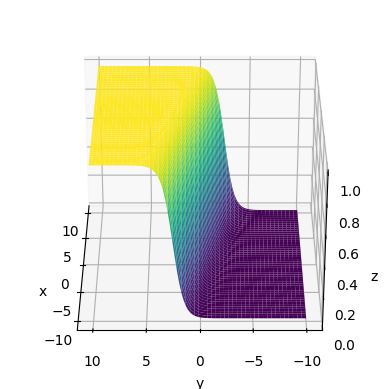

In [70]:
w1 = .5
w2 = 2
b = 0
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x1, x2)
z = sigmoid2d(x, y, w1, w2, b)
fig = plt.figure()
ax = plt.axes(projection = '3d') # this makes an enviroment which is suitable for 3d plotting.
ax.plot_surface(x, y, z, cmap = 'viridis') #virdis specifies the colormap
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 180) #30 is the height you are looking from, and the second angle 270 represents the rotation of the plot about z axis
                      # if x is fixed to some value then for all x the plots remains same, this is because y is dominating feature in here
                      # as weight value is larger

#Compute loss for a given dataset

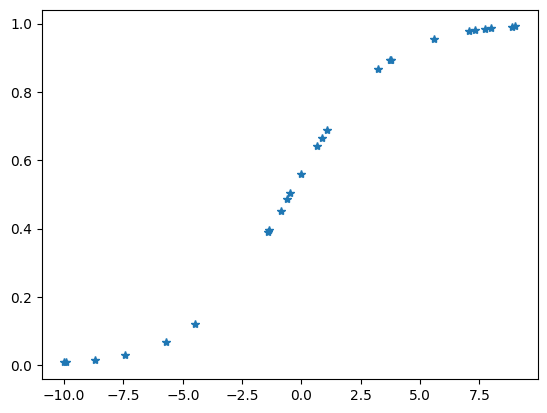

In [71]:
w_unknown = 0.5
b_unknown = 0.25
x = np.random.random(25) * 20 - 10 #creates a random vector in -10 to 10
y = sigmoid(w_unknown, x, b_unknown)
plt.plot(x, y, '*')
plt.show()

In [72]:
def calculate_loss(X, Y, w_est, b_est): #function to calculate loss for particular value of w, b.
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(w_est, x, b_est)) ** 2

  return(loss)

In [73]:
w = np.linspace(-1, 1, 100)
b = np.linspace(-1, 1, 100)
ww, wb = np.meshgrid(w, b)
Loss = np.zeros(ww.shape)


Text(0.5, 0, 'Loss')

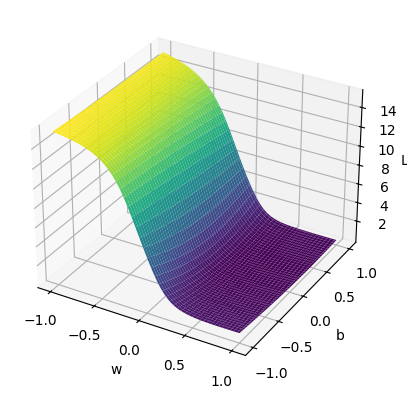

In [74]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    Loss[i, j] = calculate_loss(x, y, ww[i, j], wb[i, j]) #here y contains the values corresponding to sigmoid function with parameters w, b which are unknown

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(ww, wb, Loss, cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')


In [75]:
ij = np.argmin(Loss) # it flattens the 2d array(rowwise) and return the position where the min value is stored
i = int(np.floor(ij / Loss.shape[1])) #manually calculating row and collumn
j = int(ij - i * Loss.shape[1])

print(i, j)

62 74


In [76]:
print(ww[i, j], wb[i,j]) # value of weights with minimum Loss

0.49494949494949503 0.2525252525252526


#class for sigmoid neuron

In [77]:
class Sigmoid_Neuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return(np.dot(self.w, x) + self.b)

  def sigmoid(self, x):
    return(1.0 / (1.0 + np.exp(-x)))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return(y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return(y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, initialise = True, display_loss = False):
    if initialise:
      self.w = np.random.randn(1, X.shape[1]) #initialising weights
      self.b = 0

    if display_loss:
      loss = {}
    for i in tqdm(range(epochs), total = epochs, unit = "epoch"): #writting like this is very important in deep learning, as you can see how things are changing with time, if you want to know that for 1hr how many epochs will be required, you can use this.
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)

    return np.array(Y_pred)


#Fit for toy data

In [78]:
x = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [3, 1.25], [2, 4], [1, 5]])
y = np.asarray([1, 1, 1, 0, 0, 0])
print(type(x), type(y))
print(x.shape, y.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(6, 2) (6,)


In [79]:
sn = Sigmoid_Neuron()

In [80]:
sn.fit(x, y, 1, 0.25, True)

  0%|          | 0/1 [00:00<?, ?epoch/s]

In [81]:
# def plot_sn(X, Y, sn): # This is not a correct plot so ignore this cell
#   x1 = np.linspace(-10, 10, 100)
#   x2 = np.linspace(-10, 10, 100)

#   xx1, xx2 = np.meshgrid(x1, x2)
#   yy = np.zeros(xx1.shape)
#   for i in range(x1.size):
#     for j in range(x2.size):
#       val = np.asarray([x1[j], x2[i]])
#       yy[i, j] = sn.sigmoid(sn.perceptron(val))

#   plt.contour(xx1, xx2, yy, cmap = plt.get_cmap('viridis'), alpha = 0.6)
#   plt.scatter(X[:, 0], X[:, 1], c = Y)
#   plt.plot()

In [82]:

# for i in range(20):
#   print(sn.w, sn.b)
#   sn.fit(x, y, 1, 0.5, False)
#   plot_sn(x, y, sn)

#Working with a real world example

#Load Data

In [83]:
data = pd.read_csv('mobile_cleaned.csv') #mobile phones with some features and there rating,
                                        # we want to build a model that will classify mobile phone
                                        # is liked or not(by binariisng the output)

In [84]:
data.head() #Observe what kind of data we are dealing with.

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [85]:
data.shape #to see how many data we have

(341, 88)

In [86]:
x = data.drop('Rating', axis = 1) #feature matrix(each row contains features) axis = 1 refers to column

In [87]:
type(x) # x is a pandas dataframe

pandas.core.frame.DataFrame

In [88]:
y = data['Rating']
y = data['Rating'].values #it creates y into a numpy array
type(y)
y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [89]:
threshold = 4.2 #we can see that the rating lies between 3 and 5
              #so let us choose the binarising threshold to be 4

data['class'] = (data['Rating'] >=threshold).astype(int)

In [90]:
data['class']

,class
0,1
1,1
2,1
3,1
4,1
...,...
336,0
337,0
338,0
339,0


In [91]:
data['class'].value_counts(normalize = True) #gives percentage of the different values in data['class']
                                             #we see that percentage is not uniform so threshold is not
                                             #good, so change it from 4 to 4.2, so when we do binary classification
                                             #we should take the threshold such that it distribute the data uniformally
                                             #between 0 and 1(as we just have ratings, we don't know what rating
                                             #implies like or not like).

,proportion
class,
0,0.533724
1,0.466276


In [92]:
y_binarize = data['class'].values #binarized output
print(type(y_binarize))

<class 'numpy.ndarray'>


###Data can vary significantly in size from feature to feature, so we should standardise the data so that we get comparable weights, as otherwise the algorithm will not work very effeciently. To avoid this we put two conditions one is that each collumn should have average mean to be 0, and standard deviation to be 1. And this method is called as standardisation.

#Standardisation

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #it is like a model like perceptron or sigmoid

In [94]:
R = np.random.random([100, 1])

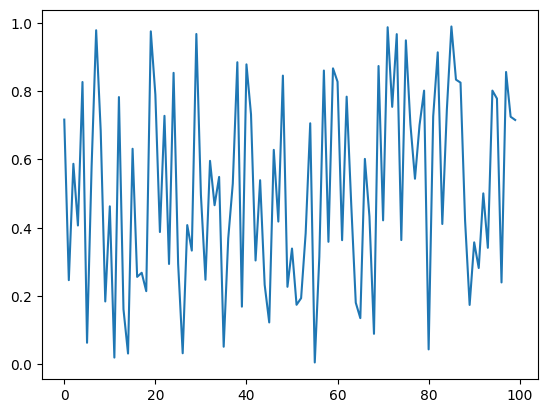

In [95]:
plt.plot(R)
plt.show()

In [96]:
np.mean(R)

0.512817835421954

In [97]:
np.std(R)

0.28433834891087223

In [98]:
scalar = StandardScaler()#creating an instance of standardscalar
type(scalar)
print(scalar)

StandardScaler()


In [99]:
scalar.fit(R) #fitting the points of R, this gives us a model based on the data R, through which we can pass
              #different data and standardize that data as done below with R.(Here R works as the training set)

StandardScaler()

In [100]:
scalar.mean_

array([0.51281784])

In [101]:
RT = scalar.transform(R) #we are not directly transforming the data R,
                         #rather we are transforming using the fitted data scalar.
                         #we are transforming the same data R that we used for fitting
                         #and it will give us a data having mean 0 and std 1.

In [102]:
np.mean(RT)

-3.1530333899354444e-16

In [103]:
np.std(RT)

0.9999999999999999

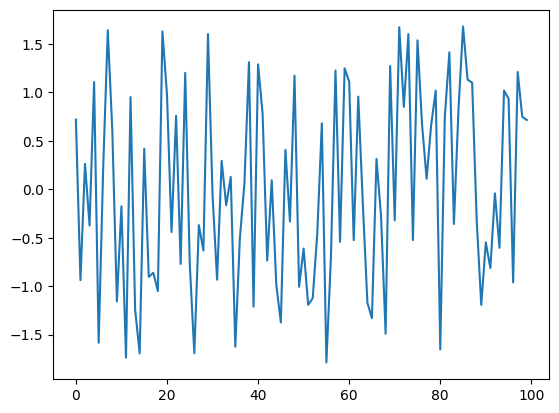

In [104]:
plt.plot(RT)
plt.show()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, stratify = y_binarize)
#stratify will make sure that the percentage of 0's and 1's are same in train and the test data

In [106]:
print(x_train.shape, x_test.shape, type(x_train))

(255, 87) (86, 87) <class 'pandas.core.frame.DataFrame'>


###Now we will standardize the train data using standardscalar fit and then use the same model(standardscalar model) to standardise the test data to test our model.

In [107]:
scalar = StandardScaler()

In [108]:
scalar = StandardScaler()
x_scaled_train = scalar.fit_transform(x_train) #Note here we are fitting and transforming at the same time.
x_scaled_test = scalar.transform(x_test) #but here we are using the above fit
print(x_scaled_train)

[[ 1.29929126 -0.90185206  0.03173306 ... -0.14142136 -0.15523011
   0.21232515]
 [-1.16225208 -0.86697607  1.03451971 ... -0.14142136 -0.15523011
   0.21232515]
 [ 1.77523922  0.65594214  0.03173306 ... -0.14142136 -0.15523011
   0.21232515]
 ...
 [ 1.44058831 -0.58796815 -0.66464655 ... -0.14142136 -0.15523011
   0.21232515]
 [-1.42253612  0.50481285  1.54984063 ... -0.14142136 -0.15523011
   0.21232515]
 [ 1.06875397  0.6791928   0.97880934 ... -0.14142136 -0.15523011
   0.21232515]]


In [109]:
minmax_scaler = MinMaxScaler() #this is another model for fitting the min and max values(i guess linearly)

In [110]:
y_scaled_train = minmax_scaler.fit_transform(y_train.reshape(-1, 1)) #it fits and transform y_train in one line
                                                                     #Expected 2D array, got 1D array instead:
                                                                     #Reshape your data either using array.reshape(-1, 1)
                                                                     #if your data has a single feature or array.reshape(1, -1)
                                                                     # if it contains a single sample.
                                                                     #So we have scaled y_train in the range (0, 1)
                                                                     #as sigmoid neuron takes values in (0, 1)

In [111]:
y_scaled_test = minmax_scaler.transform(y_test.reshape(-1, 1))

In [112]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1, 1)))[0][0]#Now as we also want
                                                                                #to compute the accuracy
                                                                                #using the binary output,
                                                                                #so we will binarize the
                                                                                #output also, and I think the
                                                                                #minmaxscalar does a linear fit
                                                                                #so we can directly apply it to
                                                                                #get the scaled_threshhold

In [113]:
print(scaled_threshold)

0.6800000000000002


In [114]:
y_binarized_train = (y_scaled_train >= scaled_threshold).astype(int).ravel() #ravel makes it an array

In [115]:
y_binarized_test = (y_scaled_test >= scaled_threshold).astype(int).ravel()

In [116]:
y_binarized_test

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

#Train on Real Data

In [117]:
sn = Sigmoid_Neuron()
print(x_scaled_train.shape, x_test.shape, type(x_scaled_train))
# print(x_train(255, 87))

(255, 87) (86, 87) <class 'numpy.ndarray'>


  0%|          | 0/2000 [00:00<?, ?epoch/s]

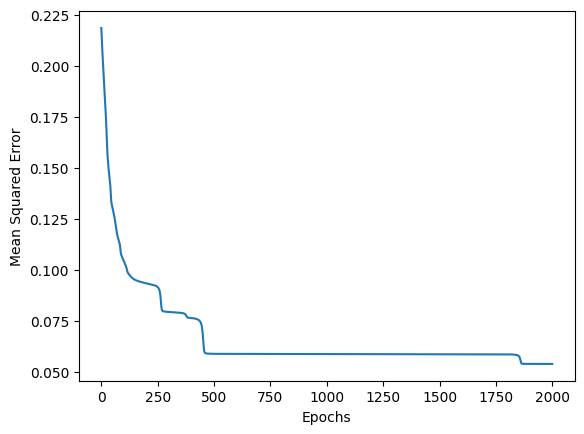

In [118]:
sn.fit(x_scaled_train, y_scaled_train, epochs = 2000, learning_rate = 0.02, display_loss = True)
#We plot these graph to do fine tuning of hyperparameters(which is very important in deep learning)
#Initially when we took learning rate = 0.01, the graph was saturating after some iterations
#as when we move towards the minima the plot becomes flat, and magnitude of the derivative decreases.
#so if we slightly increase the learning rate(say 0.015)then in we can see some more change in the loss
#Also note that this loss is different from the accuracy score that we are seeing at last, we expect
#this loss to be highly correlated with the accuracy score, but we don't know.

In [119]:
y_pred_train = sn.predict(x_scaled_train)

In [120]:
y_pred_test = sn.predict(x_scaled_test)

In [121]:
y_pred_bin_train = (y_pred_train >= scaled_threshold).astype(int).ravel()
y_pred_bin_test = (y_pred_test >= scaled_threshold).astype(int).ravel()

In [122]:
accuracy_train = accuracy_score(y_binarized_train, y_pred_bin_train)
accuracy_test = accuracy_score(y_binarized_test, y_pred_bin_test)

In [123]:
print("Train accuracy: ")
print(accuracy_train)

print("Test accuracy: ")
print(accuracy_test)

Train accuracy: 
0.7215686274509804
Test accuracy: 
0.686046511627907
